## Program to plot 2D Scatter plots using distances.

In [114]:
import pathlib
from simcoder.similarity import load_mf_encodings

import numpy as np

In [115]:
allData = load_mf_encodings(pathlib.Path("/Volumes/Data/mf_resnet50/")) # load resnet 50 encodings

ValueError: need at least one array to concatenate

In [116]:
from simcoder.similarity import euclid as euclid

def getDists(query_index,allData):
    '''Return the distances from the query to allData'''
    '''Returns an array same dimension as allData of scalars'''
    mf_query_data = allData[query_index]
    distances = euclid(mf_query_data, allData)
    return distances

In [130]:
# Turn 2 distances into x,y position

import math 

def euclid_scalar(p1: np.array, p2: np.array):
    distances = math.sqrt(np.sum((p1 - p2) ** 2))
    return distances

def convertTo2D( pivot1,pivot2,data_points):
    dists1 = euclid( pivot1,data_points )
    dists2 = euclid( pivot2,data_points )
    ipd = euclid_scalar( pivot1, pivot2 )
    x_offsets_apex = np.abs(( np.square(dists1) - np.square(dists2) + ipd**2 ) / (2 * ipd))
    y_offsets_apex = np.sqrt( np.square(dists1) - np.square(x_offsets_apex) )
    return x_offsets_apex,y_offsets_apex

In [131]:
import matplotlib.pyplot as plt

def show2Dscatter(pivot1_index,pivot2_index,data_to_plot):
    xs,ys = convertTo2D(allData[pivot1_index],allData[pivot2_index],data_to_plot)

    plt.scatter(xs, ys, c="blue")

    ipd = euclid_scalar( allData[pivot1_index], allData[pivot2_index] )

    pivot1_x = [0]
    pivot1_y = [0]

    plt.scatter(pivot1_x, pivot1_y, c="red")

    pivot2_x = [ipd]
    pivot2_y = [0]

    plt.scatter(pivot2_x, pivot2_y, c="green")

    plt.show()



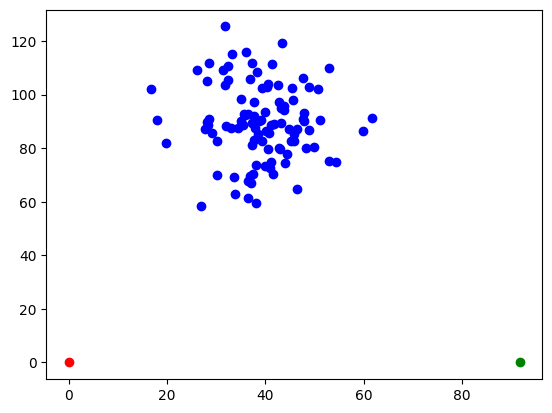

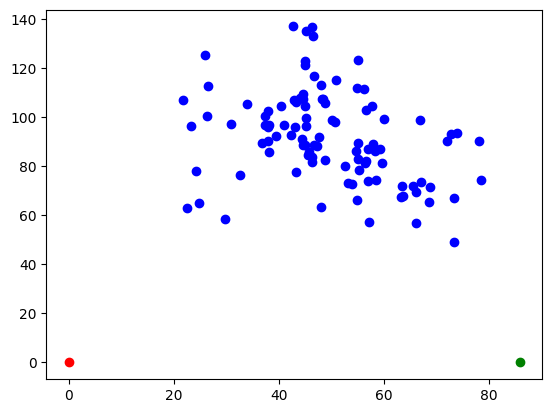

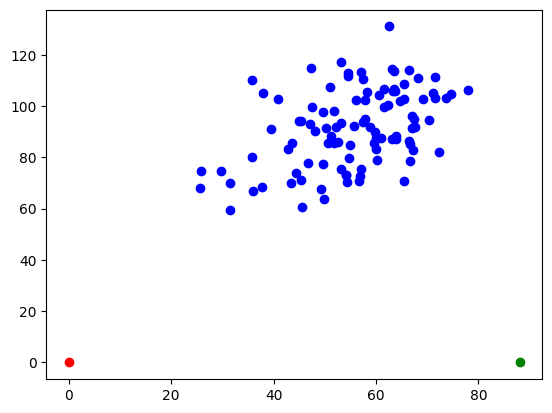

In [136]:
data_to_plot = allData[2:103]

show2Dscatter(0,1,data_to_plot)
show2Dscatter(1007,1444,data_to_plot)
show2Dscatter(2050,1004,data_to_plot)